<b>O conjunto de dados que estamos usando para analisar os impactos da covid-19 é baixado do Kaggle. Contém dados sobre:</b>

1 - O código do país

2 - Nome de todos os países

3 - Data do registro

4 - Índice de desenvolvimento humano de todos os países

5 - Casos diários de covid-19

6 - Mortes diárias por covid-19

7 - Índice de rigor dos países

8 - A população dos países

9 - PIB per capita dos países


In [50]:
#!pip install plotly

# Importação das Bobliotecas Necessárias
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Lendo dados da base utilizada CSV
dataset1 = pd.read_csv('transformed_data.csv')
dataset2 = pd.read_csv('raw_data.csv')

In [6]:
#Consultando as colunas do dataset 1
dataset1.head()


,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [7]:
#Consultando as colunas do dataset 2
dataset2.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [8]:
# Como os dados estão distribuidos pelos paises

dataset1["COUNTRY"].value_counts()
#data.loc[data["COUNTRY"] == "Afghanistan", "HDI"]

Austria            294
Nigeria            294
Georgia            294
Estonia            294
Czech Republic     294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: COUNTRY, Length: 210, dtype: int64

In [21]:
# Fazendo o valor da moda: o número mais frequente — ou seja, o número que aparece o maior número de vezes.
print('Este dataset tem o valor da Moda de paises de:  {}'.format(dataset1["COUNTRY"].value_counts().mode()))


Este dataset tem o valor da Moda de paises de:  0    294
dtype: int64


In [36]:
# Agregando os dados

code = dataset1["CODE"].unique().tolist()
country = dataset1["COUNTRY"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = dataset1["POP"].unique().tolist()
gdp = []

for i in country:
    hdi.append((dataset1.loc[dataset1["COUNTRY"] == i, "HDI"]).sum()/294)
    tc.append((dataset2.loc[dataset2["location"] == i, "total_cases"]).sum())
    td.append((data2.loc[data2["location"] == i, "total_deaths"]).sum())
    sti.append((dataset1.loc[dataset1["COUNTRY"] == i, "STI"]).sum()/294)
    population.append((dataset2.loc[dataset2["location"] == i, "population"]).sum()/294)

dados_agragados= pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)), 
                               columns = ["Codigo_Pais", "Pais", "Indice_Desenvolvimento", 
                                          "Total_Casos", "Total_Mortes", 
                                          "Indice_De_Rigor", "Populacao"])
print('Agregação Executada Com Sucesso')

Agregação Executada Com Sucesso


In [37]:
#Consultando as colunas do dataset consolidado
dados_agragados.head()

,Codigo_Pais,Pais,Indice_Desenvolvimento,Total_Casos,Total_Mortes,Indice_De_Rigor,Populacao
0,AFG,Afghanistan,0.498000,5126433.0,165875.0,3.049673,17.477233
1,ALB,Albania,0.600765,1071951.0,31056.0,3.005624,14.872537
2,DZA,Algeria,0.754000,4893999.0,206429.0,3.195168,17.596309
3,AND,Andorra,0.659551,223576.0,9850.0,2.677654,11.254996
4,AGO,Angola,0.418952,304005.0,11820.0,2.965560,17.307957


In [38]:
# Classificando dados de acordo com o total de casos

dados_classificados = dados_agragados.sort_values(["Total_Casos"], ascending = False)


In [39]:
#Consultando as colunas do dataset classificado
dados_classificados.head()

,Codigo_Pais,Pais,Indice_Desenvolvimento,Total_Casos,Total_Mortes,Indice_De_Rigor,Populacao
200,USA,United States,0.92400,746014098.0,26477574.0,3.350949,19.617637
27,BRA,Brazil,0.75900,425704517.0,14340567.0,3.136028,19.174732
90,IND,India,0.64000,407771615.0,7247327.0,3.610552,21.045353
157,RUS,Russia,0.81600,132888951.0,2131571.0,3.380088,18.798668
150,PER,Peru,0.59949,74882695.0,3020038.0,3.430126,17.311165


In [115]:
#Calculando a taxa de mortalidade dos casos de Covid-19 com todos os paises do dataset
taxa_de_mortalidade_Todos_Paises = (dados_classificados["Total_Mortes"].sum() / dados_classificados["Total_Casos"].sum())
print("Taxa de mortalidade dos casos de Covid-19 = {:.2%}".format(taxa_de_mortalidade_Todos_Paises))

Taxa de mortalidade dos casos de Covid-19 = 3.73%


In [96]:
# Top 10 paises com número de casos de covid-19

top_10_paises =  dados_classificados.head(10)

#Consultando as colunas do dataset Top 10 Paises
top_10_paises


,Codigo_Pais,Pais,Indice_Desenvolvimento,Total_Casos,Total_Mortes,Indice_De_Rigor,Populacao
200,USA,United States,0.924000,746014098.0,26477574.0,3.350949,19.617637
27,BRA,Brazil,0.759000,425704517.0,14340567.0,3.136028,19.174732
90,IND,India,0.640000,407771615.0,7247327.0,3.610552,21.045353
157,RUS,Russia,0.816000,132888951.0,2131571.0,3.380088,18.798668
150,PER,Peru,0.599490,74882695.0,3020038.0,3.430126,17.311165
125,MEX,Mexico,0.774000,74347548.0,7295850.0,3.019289,18.674802
178,ESP,Spain,0.887969,73717676.0,5510624.0,3.393922,17.660427
175,ZAF,South Africa,0.608653,63027659.0,1357682.0,3.364333,17.898266
42,COL,Colombia,0.581847,60543682.0,1936134.0,3.357923,17.745037
199,GBR,United Kingdom,0.922000,59475032.0,7249573.0,3.353883,18.033340


In [97]:
#Adicionando a renda per capita dos top 10 pais com casos de covid-19
#Nota: Os Dados foram coletados manualmente em sites da internet valores podem mudar moeda utilizada é o dolar.

top_10_paises["PIB_Antes_da_Covid_Per_Capita"] = [65279.53, 8897.49, 2100.75, 
                            11497.65, 7027.61, 9946.03, 
                            29564.74, 6001.40, 6424.98, 42354.41]
top_10_paises["PIB_Durante_da_Covid_Per_Capita"] = [63543.58, 6796.84, 1900.71, 
                            10126.72, 6126.87, 8346.70, 
                            27057.16, 5090.72, 5332.77, 40284.64]
top_10_paises

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Codigo_Pais,Pais,Indice_Desenvolvimento,Total_Casos,Total_Mortes,Indice_De_Rigor,Populacao,PIB_Antes_da_Covid_Per_Capita,PIB_Durante_da_Covid_Per_Capita
200,USA,United States,0.924000,746014098.0,26477574.0,3.350949,19.617637,65279.53,63543.58
27,BRA,Brazil,0.759000,425704517.0,14340567.0,3.136028,19.174732,8897.49,6796.84
90,IND,India,0.640000,407771615.0,7247327.0,3.610552,21.045353,2100.75,1900.71
157,RUS,Russia,0.816000,132888951.0,2131571.0,3.380088,18.798668,11497.65,10126.72
150,PER,Peru,0.599490,74882695.0,3020038.0,3.430126,17.311165,7027.61,6126.87
125,MEX,Mexico,0.774000,74347548.0,7295850.0,3.019289,18.674802,9946.03,8346.70
178,ESP,Spain,0.887969,73717676.0,5510624.0,3.393922,17.660427,29564.74,27057.16
175,ZAF,South Africa,0.608653,63027659.0,1357682.0,3.364333,17.898266,6001.40,5090.72
42,COL,Colombia,0.581847,60543682.0,1936134.0,3.357923,17.745037,6424.98,5332.77
199,GBR,United Kingdom,0.922000,59475032.0,7249573.0,3.353883,18.033340,42354.41,40284.64


In [55]:
#Analisando a propagação dos casos Covid-19 com a biblioteca plotly
grafico = px.bar(top_10_paises, 
                 y='Total_Casos', 
                 x='Pais', 
                 title='Países com mais casos de Covid')
grafico.show()

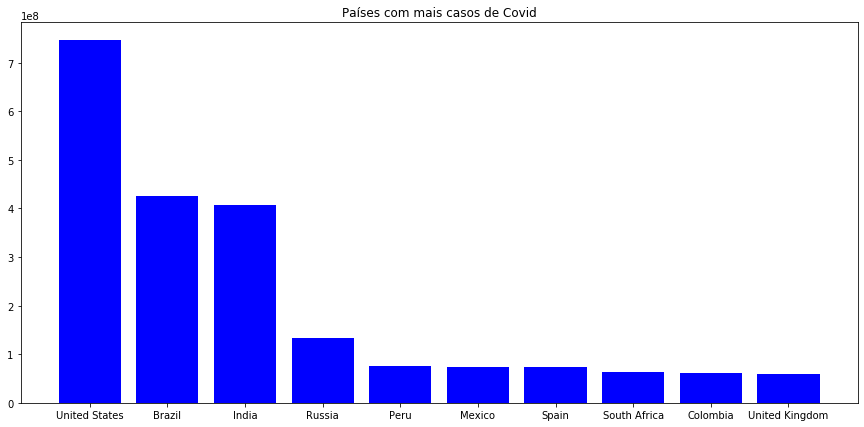

In [49]:
#Analisando a propagação dos casos Covid-19 com a biblioteca matplotlib
plt.figure(figsize=(15,7))
plt.bar('Pais','Total_Casos',data= top_10_paises, color='b')
plt.title('Países com mais casos de Covid')
plt.show()

In [59]:
#Analisando a propagação de mortes por Covid-19 com a biblioteca plotly
grafico = px.bar(top_10_paises, 
                 y='Total_Mortes', 
                 x='Pais', 
                 title='Países com mais Mortes por Covid-19')
grafico.show()

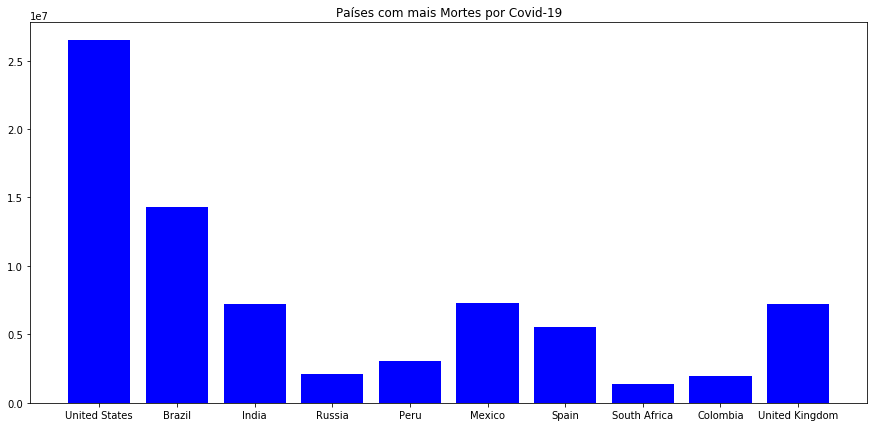

In [60]:
#Analisando a propagação de mortes por Covid-19 com a biblioteca matplotlib
plt.figure(figsize=(15,7))
plt.bar('Pais','Total_Mortes',data= top_10_paises, color='b')
plt.title('Países com mais Mortes por Covid-19')
plt.show()

In [73]:
#Analisando os casos com mortes por Covid-19 com a biblioteca plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_10_paises["Pais"],
    y=top_10_paises["Total_Casos"],
    name='Total Casos',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=top_10_paises["Pais"],
    y=top_10_paises["Total_Mortes"],
    name='Total_Mortes',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [67]:
#Agrupando por Pais o Total de morte e Total de Casos
Casos_Mortes = top_10_paises.groupby("Pais")['Total_Mortes','Total_Casos']
Casos_Mortes.sum().sort_values(["Total_Casos"], ascending = False)

,Total_Mortes,Total_Casos
Pais,,
United States,26477574.0,746014098.0
Brazil,14340567.0,425704517.0
India,7247327.0,407771615.0
Russia,2131571.0,132888951.0
Peru,3020038.0,74882695.0
Mexico,7295850.0,74347548.0
Spain,5510624.0,73717676.0
South Africa,1357682.0,63027659.0
Colombia,1936134.0,60543682.0


<Figure size 1440x1080 with 0 Axes>

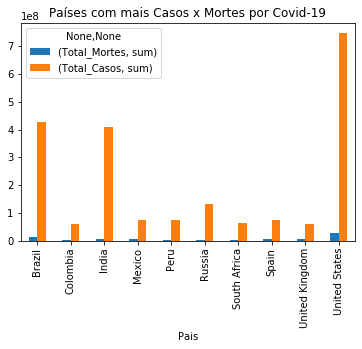

In [71]:
#Analisando a propagação de mortes por Covid-19 com a biblioteca matplotlib
plt.figure(figsize=(20,15))
Casos_Mortes.agg(['sum']).plot.bar()
plt.title('Países com mais Casos x Mortes por Covid-19')
plt.show()

In [77]:
# Percentual do Total Casos comparando com as mortes
casos = top_10_paises["Total_Casos"].sum()
mortes = top_10_paises["Total_Mortes"].sum()

labels = ["Total Casos", "Total Morte"]
values = [casos, mortes]

fig = px.pie(data, values=values, names=labels, 
             title='Percentual do Total Casos e Mortes', hole=0.5)
fig.show()

In [116]:
#Calculando a taxa de mortalidade dos casos de Covid-19 com todos os paises do dataset
taxa_de_mortalidade_Top_10 = (top_10_paises["Total_Mortes"].sum() / top_10_paises["Total_Casos"].sum())
print("Taxa de mortalidade dos casos de Covid-19 = {:.2%}".format(taxa_de_mortalidade_Top_10))

Taxa de mortalidade dos casos de Covid-19 = 3.61%


In [92]:
#Indice de Rigor de resttições durante a Covid-19

fig = px.bar(top_10_paises, x='Pais', y='Total_Casos',
             hover_data=['Populacao', 'Total_Mortes'], 
             color='Indice_De_Rigor', height=400, 
             title= "Indice de Rigor durante a Covid-19")
fig.show()

<b>Analsando os impactos da Covid-19 na Economia</b>

In [100]:
#Analisando os impactos da Covid-19 na Economia
fig = px.bar(top_10_paises, x='Pais', y='Total_Casos',
             hover_data=['Populacao', 'Total_Mortes'], 
             color='PIB_Antes_da_Covid_Per_Capita', height=400, 
             title="PIB Per Capita antes da Covid-19")
fig.show()

In [101]:
#Analisando os impactos da Covid-19 na Economia
fig = px.bar(top_10_paises, x='Pais', y='Total_Casos',
             hover_data=['Populacao', 'Total_Mortes'], 
             color='PIB_Durante_da_Covid_Per_Capita', height=400, 
             title="PIB Per Capita durante da Covid-19")
fig.show()

In [103]:
#Comparando os impactos antes e durante Covid-19 na Economia
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_10_paises["Pais"],
    y=top_10_paises["PIB_Antes_da_Covid_Per_Capita"],
    name='PIB Per Capita antes da Covid-19',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=top_10_paises["Pais"],
    y=top_10_paises["PIB_Durante_da_Covid_Per_Capita"],
    name='PIB Per Capita durante da Covid-19',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [107]:
#Analisando o indice de desenvolvimento humando durante Covid-19 
fig = px.bar(top_10_paises, x='Pais', y='Total_Casos',
             hover_data=['Populacao', 'Total_Mortes'], 
             color='Indice_Desenvolvimento', height=400, 
             title="Indice de desenvolvimento humando durante Covid-19")
fig.show()

<font size="7"> <b>Conclusão</b> </font>

<font size="4"> Nesta tarefa, estudamos a disseminação da covid-19 entre os países top 10 em número de casos e seu impacto na economia global.</br> Vimos que o surto de covid-19 resultou no maior número de casos e mortes de covid-19 nos estados unidos. Uma das possiveis razões por trás disso é o índice de rigor dos Estados Unidos. É comparativamente baixo de acordo com a população.</br> Também analisamos como o PIB per capita de cada país foi afetado durante o surto de covid-19 principalmente em paises que tiveram mais números de casos.</br> Foi possivel analisar tambem que o indice de morte por covid-19 nesse estudo e de 3,61% para o top 10 paises que é menor se comparado com todos os paises que é de 3,73%.</br> Espero que você tenha gostado deste artigo sobre análise de impactos do Covid-19 usando Python.</font>